# **Описание проекта: исследование интернет-магазина «Подарочек»**

В качестве тестового задания исследуйте данные онлайн-магазина подарков.

Магазин зачастую отправляет товары по почте, работает как с оптовыми, так и с розничными покупателями. 

Вы должны применить Python для анализа данных и показать, что можете самостоятельно решить задачу по исследованию данных, сегментации клиентов и проверке статистических гипотез.

## Описание данных

__Основной датасет (df)__
- entry_date — дата записи;
- order_id — идентификационный номер заказа;
- customer_id — идентификационный номер клиента;
- quantity — количество;
- price — цена;
- name_clust — автоматически присвоенная группа записи на основе названия;
- entry_id — идентификационный номер записи;
- country_id — идентификационный номер страны.

__Текстовое описание записей (df_text)__
- entry_id — идентификационный номер записи;
- entry — запись.

Датасеты содержит данные, которые несут в себе информацию о клиентах онлайн магазина Подарочек
- основной датасет содержит информацию о заказах, включая дату, идентификаторы заказов и клиентов, количество товаров, их цену

- текстовый датасет дополняет основной датасет описаниями записей

__Цель работы__

- Необходимо исследовать данные онлайн-магазина подарков с целью анализа поведения клиентов, сегментации их на основе различных характеристик и проверки статистических гипотез. 
- Данный проект  поможет  как понять исследуемых клиентов,так и  улучшить взаимодействие компании  с ними, что приведет к повышению эффективность бизнесса компании.

__План работы:__ <a name="chapter0"></a>
- [Шаг 1. Получение, осмотр и объединение данных](#chapter1)
  - Загрузка данных из csv-файлов в датафреймы.
  - Изучить общую информацию о датафреймах.
  -  Проверить наличие пропусков и принять решение о их заполнении.
  - Проверить наличие дубликатов и принять решение о их удалении.
  - Привести типы данных в каждом столбце к нужным форматам.
  -  Проверить соответствие идентификационных номеров.
  -  Объединить информацию из всех датафреймов в один.
-  [Шаг 2. Предобработка и начало исследовательского анализа](#chapter2)
   -  Найдите выбросы и аномальные значения в столбцах price и quantity, рассчитайте сумму стоимости каждой товарной позиции в датасете, примите и реализуйте решение о сохранении или отбрасывании подозрительных данных.
   -  Изучите столбцы order_id, customer_id, name_clust, entry_id и country_id.
   -  Изучите полноту данных, анализируя время записей. Посчитайте по месяцам количество дней, в которых не было продаж. Выберите период для анализа, содержащий основную часть данных, и далее работайте только с актуальными данными.

- [Шаг 3. Расчёт метрик](#chapter3)
    - Оцените по часам и дням недели количество заказов и количество уникальных покупателей. Постройте графики и сделайте вывод о наличии цикличности в покупательской активности.
    - Рассчитайте по месяцам среднюю выручку с клиента в день и количество уникальных покупателей. Сделайте вывод о наличии или отсутствии сезонности, если это возможно.
    - Рассчитайте стики-фактор за второй и третий квартал 2019 года.
    - Составьте профиль каждого клиента, включите в профиль количество заказов, дату первого и последнего заказа, общую сумму всех заказов, среднюю цену заказа, а также другие показатели по вашему выбору.
    - Разделите клиентов на возвратных и нет по признаку наличия повторных покупок, для каждой из групп на основе профилей клиентов (когда это возможно) рассчитайте средние показатели и оцените их.
- [Шаг 4. Проведение RFM-сегментацию клиентов](#chapter4)
    - разделите клиентов на группы по методике RFM;
    - оцените получившиеся группы, найдите похожие и различающиеся;
    - сформулируйте рекомендации для бизнеса по взаимодействию с сегментами, сопроводив их подходящими графиками и таблицами.
- [Шаг 5.Проверка статистических гипотез](#chapter5)
    - Сравните доли возвратных и невозвратных клиентов за второй и третий квартал 2019 года при помощи подходящего статистического теста.
    - Сравните средние чеки в странах с country_id, равному 3, 6 и 24. На основе статистических тестов сделайте вывод о том, отличаются ли средние чеки в этих странах или нет.
    - Сформулируйте собственную гипотезу и проверьте её.
- [Шаг 6. Выводы по проекту](#chapter6)
    - Опишите полученные результаты и зафиксируйте итоговый вывод проведённого исследования.

# Шаг 5. Проверка статистических гипотез <a name="chapter5"></a>

1. Сравните доли возвратных и невозвратных клиентов за второй и третий квартал 2019 года при помощи подходящего статистического теста.

для сравнения долей предлагается использовать Z-тест

шаги
- отфильруем по кварталам
- группируем по клинетаи и оасчёт метрики
- класификация на возвртаных и нет

In [179]:
import pandas as pd

# Фильтрация 
q2_data = analysis_period[(analysis_period['entry_date'] >= '2019-04-01') & (analysis_period['entry_date'] <= '2019-06-30')]
q3_data = analysis_period[(analysis_period['entry_date'] >= '2019-07-01') & (analysis_period['entry_date'] <= '2019-09-30')]
display(q2_data['entry_date'].describe())
display(q3_data['entry_date'].describe())

/tmp/ipykernel_31/3206537748.py:6: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



count                   40254
unique                   3186
top       2019-05-22 13:01:00
freq                      166
first     2019-04-01 08:22:00
last      2019-06-29 16:44:00
Name: entry_date, dtype: object

/tmp/ipykernel_31/3206537748.py:7: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



count                   47740
unique                   3404
top       2019-09-21 14:40:00
freq                      268
first     2019-07-01 08:16:00
last      2019-09-29 18:53:00
Name: entry_date, dtype: object

In [180]:
import pandas as pd

# Фильтрация 
q2_data = analysis_period[(analysis_period['entry_date'] >= '2019-04-01') & (analysis_period['entry_date'] <= '2019-06-30')]
q3_data = analysis_period[(analysis_period['entry_date'] >= '2019-07-01') & (analysis_period['entry_date'] <= '2019-09-30')]

In [181]:
# Группировка данных по клиентам
q2_customer_orders = q2_data.groupby('customer_id')['order_id'].nunique().reset_index()
q3_customer_orders = q3_data.groupby('customer_id')['order_id'].nunique().reset_index()
display(q2_customer_orders)
display(q3_customer_orders)

,customer_id,order_id
0,1713,1
1,1717,4
2,1719,1
3,1728,2
4,1737,1
...,...,...
1832,7644,1
1833,7645,1
1834,7646,1
1835,7647,1


,customer_id,order_id
0,1717,2
1,1718,1
2,1722,1
3,1728,2
4,1735,2
...,...,...
1958,7638,3
1959,7640,1
1960,7642,1
1961,7648,2


In [182]:
import pandas as pd

# Классификация клиентов на возвратных и невозвратных
q2_customer_orders['type'] = q2_customer_orders['order_id'].apply(lambda x: 'возвратный' if x > 1 else 'невозвратный')
q3_customer_orders['type'] = q3_customer_orders['order_id'].apply(lambda x: 'возвратный' if x > 1 else 'невозвратный')
display(q2_customer_orders)
display(q3_customer_orders)

,customer_id,order_id,type
0,1713,1,невозвратный
1,1717,4,возвратный
2,1719,1,невозвратный
3,1728,2,возвратный
4,1737,1,невозвратный
...,...,...,...
1832,7644,1,невозвратный
1833,7645,1,невозвратный
1834,7646,1,невозвратный
1835,7647,1,невозвратный


,customer_id,order_id,type
0,1717,2,возвратный
1,1718,1,невозвратный
2,1722,1,невозвратный
3,1728,2,возвратный
4,1735,2,возвратный
...,...,...,...
1958,7638,3,возвратный
1959,7640,1,невозвратный
1960,7642,1,невозвратный
1961,7648,2,возвратный


In [183]:
# Подсчет количества возвратных и невозвратных клиентов
q2_counts = q2_customer_orders['type'].value_counts()
q3_counts = q3_customer_orders['type'].value_counts()

# Создание таблицы для теста
contingency_table = pd.DataFrame({'Q2': q2_counts, 'Q3': q3_counts}).fillna(0)

print(contingency_table)

                Q2    Q3
невозвратный  1127  1202
возвратный     710   761


In [184]:
q2_customer_orders.describe()

,customer_id,order_id
count,1837.000000,1837.000000
mean,4694.522591,1.838868
std,1714.938093,1.903486
min,1713.000000,1.000000
25%,3209.000000,1.000000
50%,4749.000000,1.000000
75%,6169.000000,2.000000
max,7653.000000,39.000000


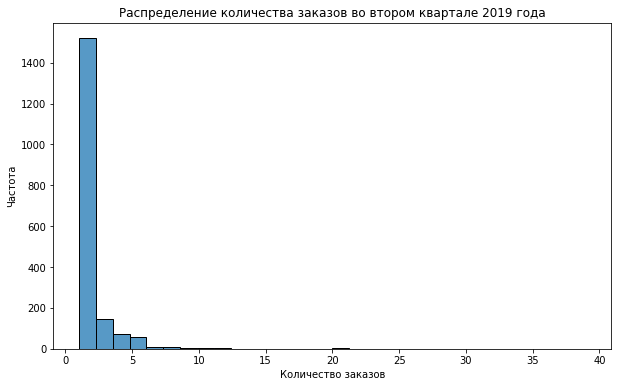

In [185]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Данные для второго квартала
data_q2 = q2_customer_orders['order_id']

# Построение гистограммы
plt.figure(figsize=(10, 6))
sns.histplot(data_q2, bins=30)
plt.title('Распределение количества заказов во втором квартале 2019 года')
plt.xlabel('Количество заказов')
plt.ylabel('Частота')
plt.show()

In [186]:
q3_customer_orders.describe()

,customer_id,order_id
count,1963.000000,1963.000000
mean,4760.292919,1.830362
std,1719.118046,1.815174
min,1717.000000,1.000000
25%,3289.500000,1.000000
50%,4757.000000,1.000000
75%,6256.500000,2.000000
max,7653.000000,32.000000


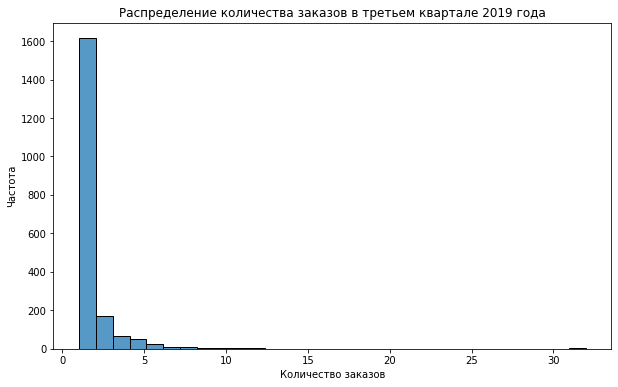

In [187]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Данные для третьего квартала
data_q3 = q3_customer_orders['order_id']

# Построение гистограммы
plt.figure(figsize=(10, 6))
sns.histplot(data_q3, bins=30)
plt.title('Распределение количества заказов в третьем квартале 2019 года')
plt.xlabel('Количество заказов')
plt.ylabel('Частота')
plt.show()

данные распределены схожим образом в обоих кварталах.

In [188]:
from statsmodels.stats.proportion import proportions_ztest

# Количество возвратных и невозвратных клиентов за каждый квартал
q2_returning = q2_counts['возвратный']
q2_non_returning = q2_counts['невозвратный']
q3_returning = q3_counts['возвратный']
q3_non_returning = q3_counts['невозвратный']

# Общее количество клиентов за каждый квартал
n_q2 = q2_returning + q2_non_returning
n_q3 = q3_returning + q3_non_returning

# Количество возвратных клиентов за каждый квартал
counts = [q2_returning, q3_returning]

# Общее количество клиентов за каждый квартал
nobs = [n_q2, n_q3]

# Выполнение Z-теста для пропорций
stat, pval = proportions_ztest(counts, nobs)

print(f"Z-статистика: {stat}")
print(f"p-значение: {pval}")

Z-статистика: -0.07413413721799754
p-значение: 0.9409036524133968


- выводы
  - Z-статистика: -0.0741 указывает на незначительное различие между долями возвратных клиентов во втором и третьем кварталах 2019 года.
  - p-значение (p-value): 0.9409 значительно превышает уровень значимости 0.05, нет статист значимых различий,то есть не отклоняем нулевую гипотезу

2. Сравните средние чеки в странах с country_id, равному 3, 6 и 24. На основе статистических тестов сделайте вывод о том, отличаются ли средние чеки в этих странах или нет.

In [189]:
import pandas as pd

# Фильтрация данных для стран с country_id 3, 6 и 24
country_ids = [3, 6, 24]
filtered_data_3_6_24 = analysis_period[analysis_period['country_id'].isin(country_ids)]
display(filtered_data_3_6_24['country_id'].unique())

# Рассчет среднего чека для каждой страны
country_means = filtered_data_3_6_24.groupby('country_id')['total_cost'].mean().reset_index()
print(country_means)

array([ 6,  3, 24])

   country_id   total_cost
0           3  1667.637654
1           6  1769.217194
2          24  2087.190840


In [190]:
from scipy.stats import ttest_ind

# Данные для стран с country_id 3, 6 и 24
data_3 = filtered_data_3_6_24[filtered_data_3_6_24['country_id'] == 3]['total_cost']
data_6 = filtered_data_3_6_24[filtered_data_3_6_24['country_id'] == 6]['total_cost']
data_24 = filtered_data_3_6_24[filtered_data_3_6_24['country_id'] == 24]['total_cost']

# Выполнение t-тестов для сравнения средних двух независимых групп

# Сравнение стран 3 и 6
t_stat_3_6, p_value_3_6 = ttest_ind(data_3, data_6, equal_var=False)
print(f"t-тест (страна 3 и страна 6): t-статистика: {t_stat_3_6}, p-значение: {p_value_3_6}")

# Сравнение стран 3 и 24
t_stat_3_24, p_value_3_24 = ttest_ind(data_3, data_24, equal_var=False)
print(f"t-тест (страна 3 и страна 24): t-статистика: {t_stat_3_24}, p-значение: {p_value_3_24}")

# Сравнение стран 6 и 24
t_stat_6_24, p_value_6_24 = ttest_ind(data_6, data_24, equal_var=False)
print(f"t-тест (страна 6 и страна 24): t-статистика: {t_stat_6_24}, p-значение: {p_value_6_24}")

t-тест (страна 3 и страна 6): t-статистика: -3.858332084231635, p-значение: 0.0001171670936360917
t-тест (страна 3 и страна 24): t-статистика: -3.1028048714018777, p-значение: 0.0023302456942105552
t-тест (страна 6 и страна 24): t-статистика: -2.3641537837125117, p-значение: 0.019510759864204995


- во всех тестах р=значение меньше 0.05
- значит отклоняем нулнвую гипотеуз

__На основании t-тестов можно сделать вывод, что средние чеки в странах с country_id 3, 6 и 24 статистически значимо различаются.__

3. Сформулируйте собственную гипотезу и проверьте её.

Средние чеки клиентов по покупкам в выходные, выше, чем средние чеки клиентов в будни

In [195]:
import pandas as pd

# Добавим столбец с названием дня недели
analysis_period['day_name'] = analysis_period['entry_date'].dt.day_name()
display(analysis_period['day_name'].unique())

array(['Saturday', 'Sunday', 'Monday', 'Wednesday', 'Thursday', 'Friday'],
      dtype=object)

In [196]:
# Разделим данные на две группы: покупки в выходные и в будние дни
sat_sun_data = analysis_period[analysis_period['day_name'].isin(['Saturday', 'Sunday'])]
mn_fr_data = analysis_period[analysis_period['day_name'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]
display(sat_sun_data['day_name'].unique())
display(mn_fr_data['day_name'].unique())

array(['Saturday', 'Sunday'], dtype=object)

array(['Monday', 'Wednesday', 'Thursday', 'Friday'], dtype=object)

In [197]:
# Рассчитаем средний чек для каждой группы
sat_sun_mean = sat_sun_data['total_cost'].mean()
mn_fr_mean = mn_fr_data['total_cost'].mean()

print(f"Средний чек в выходные дни: {sat_sun_mean}")
print(f"Средний чек в будние дни: {mn_fr_mean}")

Средний чек в выходные дни: 1238.05083522948
Средний чек в будние дни: 1109.9641129128365


In [198]:
from scipy.stats import ttest_ind

# Данные для выходных и будних дней
sat_sun_total_cost = sat_sun_data['total_cost']
mn_fr_total_cost = mn_fr_data['total_cost']

# Выполнение t-теста для сравнения средних двух независимых групп
t_stat, p_value = ttest_ind(sat_sun_total_cost, mn_fr_total_cost, equal_var=False)

print(f"t-статистика: {t_stat}")
print(f"p-значение: {p_value}")

t-статистика: 24.551589490390768
p-значение: 7.792396831790474e-133


- отклоняем нулевую гипотезу
- средние чеки в выходные дни статистически значимо отличаются от средних чеков в будние дни

<div class="alert alert-info">
  <b> * <a href="#chapter0">к содержанию</a> </b> 
</div>

---